In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import numpy.random as rnd

In [2]:
def plot_3d(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = matrix[0]
    y = matrix[1]
    z = matrix[2]

    ax.scatter(x, y, z, c='r')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()


(3, 1327)


<IPython.core.display.Javascript object>


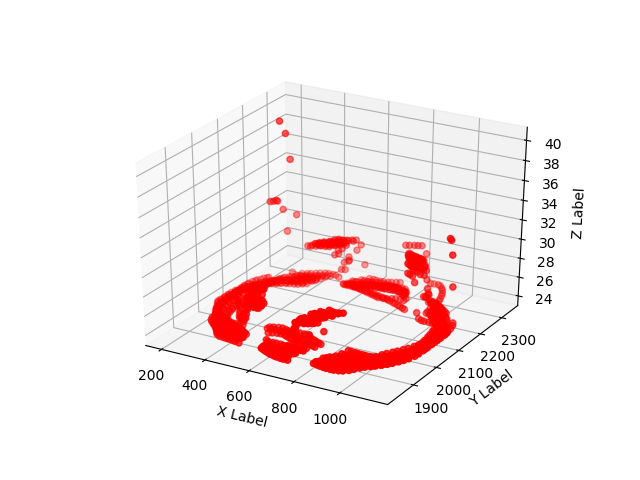

In [7]:
matX = np.loadtxt('q3dm1-path1.csv', delimiter=',')
matX = matX.T
print(matX.shape)
plot_3d(matX)

In [3]:
def initRingSOM(matX, k):
    G = nx.generators.lattice.grid_2d_graph(k, 1, periodic=True)
    G = nx.convert_node_labels_to_integers(G)
    m, n = matX.shape
    smpl = rnd.choice(n, k, replace=False)
    for i, v in enumerate(G):
        G.nodes[v]['w'] = matX[:,smpl[i]]
    return G

In [8]:
def plot_3d_som(matrix, som):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = matrix[0]
    y = matrix[1]
    z = matrix[2]

    ax.scatter(x, y, z, c='r', marker='o', s=30, alpha=0.1)
    
    for i,v in enumerate(som):
        print(som.nodes[v]['w'])
    
    
   # for i in som.edges:
        #print(i)
        xe, ye = i
        ax.plot3D([matrix[0,xe],matrix[0,ye]], [matrix[1,xe], matrix[1,ye]], [matrix[2,xe], matrix[2,ye]], "black", alpha=1)
    
    
    for i in som.edges:
        xe, ye = i
        ax.plot3D([x[xe], x[ye]], [y[xe], y[ye]], [z[xe], z[ye]], "blue")
    
    #x1 = som[0]
    #y1 = som[1]
   
    
    #ax.plot(x1, y1, c='r')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    
    
    plt.show()


In [9]:
def trainSOM(matX, G, tmax=1000, sigma0=1., eta0=1.):
    m, n = matX.shape
    # compute matrix of squared path length distances between neurons
    # NOTE: networkx returns a numpy matrix, but we want a numpy array
    #       because this allows for easy squaring of its entries
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2
    # a list of tmax random indices into the columns of matrix X
    smpl = rnd.randint(0, n, size=tmax)
    for t in range(tmax):
        # sample a point x, i.e. a column of matrix X
        vecX = matX[:,smpl[t]]
        # determine the best matching unit
        b = np.argmin([np.sum((G.nodes[v]['w'] - vecX)**2) for v in G])
        # update the learning rate
        eta = eta0*(1. - t/tmax)
        # update the topological adaption rate
        sigma = sigma0*np.exp(-t/tmax)
        # update all weights
        for i, v in enumerate(G):
            # evaluate neighborhood function
            h = np.exp(-0.5*matD[b,i] / sigma**2)
            G.nodes[v]['w'] += eta*h*(vecX - G.nodes[v]['w'])
    return G

In [10]:
SOM1 = initRingSOM(matX, 24)

In [11]:
for _ in range(100000):
    SOM1 = trainSOM(matX, SOM1, tmax=10000)

KeyboardInterrupt: 

In [ ]:
nx.write_gpickle(SOM1, 'som.gpickle')
SOM2 = nx.read_gpickle('som.gpickle')
SOM3 = trainSOM(matX, SOM2, tmax=10000)

In [10]:
#.nodes[node_num]['w']

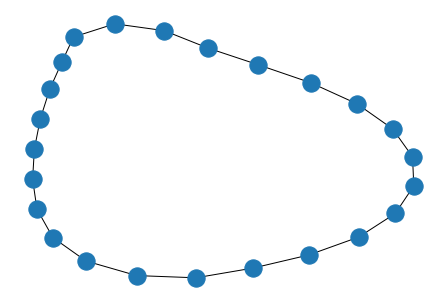

In [11]:
nx.draw(SOM3)

In [ ]:

plot_3d_som(matX,SOM3)

In [ ]:
Y_true = matX
Y_pred = nx.adjacency_matrix(SOM3)
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 

In [ ]:
print(np.round(MSE,2))

In [13]:
def initTwoRingSOM(matX,k):
    knew = int(k/2)
    G = nx.generators.lattice.grid_2d_graph(knew, 1, periodic=True)
    H = nx.generators.lattice.grid_2d_graph(knew, 1, periodic=True)
    G = nx.disjoint_union(G,H)
    for k in range(0,knew-1):
        G.add_edge(k, k+1)
    #G.add_edge(knew, knew+1)
    G = nx.convert_node_labels_to_integers(G)
    m, n = matX.shape
    smpl = rnd.choice(n, k, replace=False)
    for i, v in enumerate(G):
        G.nodes[v]['w'] = matX[:,smpl[i]]
    return G

In [14]:
SOM2 = initTwoRingSOM(matX, 24)
SOM2 = trainSOM(matX, SOM2, tmax=10000)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:
nx.draw(SOM2)

In [ ]:
SOM3 = nx.generators.classic.wheel_graph(24)

In [ ]:
SOM3 = trainSOM(matX, SOM3, tmax=10000)

In [ ]:
nx.draw(SOM3)

# Problem 3

In [ ]:
import numpy as np

In [ ]:
data = "ACAACACAACACAACCCCBCBAAAAACCCABCCCABCAAACACCCCAAACACAACBBBCACCAACAABCCAACCCCACABACACCACCCCCCBACCBACABCCAACCCCCABAAAACABCABCAACAACCBAAACACAAAACCBAAAABCCABCACAABAABAAACACBBABBAC"

In [ ]:
sseq = list(data)
states = sorted(list(set(sseq)))
indices = list(range(len(states)))

In [ ]:
print(states)
print(indices)

In [ ]:
state2index = dict(zip(states, indices))
index2state = dict(zip(indices, states))
iseq = [state2index[s] for s in sseq]

In [ ]:
def estimateStateTransitions(indices, iseq):
    m = len(indices)
    P = np.zeros((m,m))
    for t in range(1, len(iseq)):
        P[iseq[t],iseq[t-1]] += 1.
    return P / np.sum(P, axis=0)

In [ ]:
P4 = estimateStateTransitions(indices, iseq)
P4 = np.round(P4, 2)
print (P4)

In [ ]:
iseq = [state2index[s] for s in sseq]
n = len(iseq)
print(n)

In [ ]:
matP4 = P4
prob4 = np.prod([ matP4[iseq[t],iseq[t-1]] for t in range(1,n) ])
like4 = np.sum([ np.log(matP4[iseq[t],iseq[t-1]]) for t in range(1,n) ])


In [ ]:
print(prob4)
like4 = np.round(like4, 2)
print(like4)



# Prpblem 4

In [ ]:
P3 = np.array([[0.12,0.10,0.02],[0.80,0.80 ,0.80],[0.08 ,0.10 ,0.18]])

In [ ]:
print(P3)

In [ ]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd

In [ ]:
def find_vec(matP):
    m = matP.shape[0]
    vecB = np.hstack((np.zeros(m), 1))
    matI = np.eye(m)
    matA = np.vstack((matI-matP, np.ones(m)))
    vecPI = la.lstsq(matA, vecB)[0]
    return vecPI

In [ ]:
vecPI3 = find_vec(P3)

vecPI3 = np.round(vecPI3, 2)
print(vecPI3)

vecPI4 = find_vec(P4)
vecPI4 = np.round(vecPI4, 2)
print(vecPI4)

# Problem 1

In [ ]:
import numpy as np
import numpy.random as rnd

In [ ]:
states  = ['A', 'B', 'C']
indices = range(len(states))

state2index = dict(zip(states, indices))
index2state = dict(zip(indices, states))

In [ ]:
P3 = np.array([[0.12,0.10,0.02],[0.80,0.80 ,0.80],[0.08 ,0.10 ,0.18]])
print(P3)

In [ ]:
log_e1 = np.log(1) + np.log(0.8) + np.log(0.1) 

log_e1 = np.round(log_e1, 2)
print(log_e1)
print(np.log(1))
print(np.log(0.8))
print(np.log(0.1))


# Problem 2

In [ ]:
def generateStateSequence(s, P, tau):
    sseq = [s]
    iold = state2index[s]
    for t in range(tau):
        inew = rnd.choice(indices, p=P[:,iold])
        sseq.append(index2state[inew])
        iold = inew
    return sseq

In [ ]:
states  = ['A', 'B', 'C']
indices = range(len(states))

state2index = dict(zip(states, indices))
index2state = dict(zip(indices, states))

In [ ]:
P3 = np.array([[0.12,0.10,0.02],[0.80,0.80 ,0.80],[0.08 ,0.10 ,0.18]])
print(P3)
sseq = generateStateSequence('B', P3, 19)
iseq = [state2index[s] for s in sseq]
tmax = len(iseq)
print(tmax)

In [ ]:
print(sseq)
print (''.join(sseq))

In [ ]:
like1 = np.sum([ np.log(P3[iseq[t],iseq[t-1]]) for t in range(1,tmax) ])
print(like1)

like1 = np.round(like1,2)
print(like1)

In [ ]:
likeli_hood =  np.array([])
likeli_hood_round =  np.array([])

for _ in range(10000):
    sseq = generateStateSequence('B', P3, 19)
    iseq = [state2index[s] for s in sseq]
    tmax = len(iseq)
    like1 = np.sum([ np.log(P3[iseq[t],iseq[t-1]]) for t in range(1,tmax) ])
    
    likeli_hood = np.append(likeli_hood,like1)

    like1 = np.round(like1,2)
    likeli_hood_round = np.append(likeli_hood_round,like1)
    
    
    

In [ ]:
mean_value = np.mean(likeli_hood)
variance = np.var(likeli_hood)

print(np.round(mean_value,2))
print(np.round(variance,2))

mean_value = np.mean(likeli_hood_round)
variance = np.var(likeli_hood_round)

print(mean_value)
print(variance)

# Program 7

In [ ]:
import numpy as np

In [ ]:
matX = np.loadtxt('q3dm1-path1.csv', delimiter=',')
print(matX.shape)
matX = matX.T
print(matX.shape)

In [ ]:
print(matX.shape[0])
print(len(matX[0]))
print(len(matX[0])-1)


In [ ]:
velo_arr =  np.zeros( (3, 1326) )
for val in range(matX.shape[0]):
    print(val)
    
    for points in range(0,len(matX[val])-1):
        #print(str(points)+ " " + str(matX[val][points])) 
        velocity = matX[val][points + 1] - matX[val][points]
        #print(velocity)
        velo_arr[val][points] = velocity
    print(np.round(np.average(velo_arr[val]),4))
    
print(velo_arr)


In [ ]:
avg_velo = np.array([0.0041, 0.165,0])

In [ ]:
from scipy.cluster.vq import kmeans2
centroid_9, label = kmeans2(velo_arr.T,k=9, minit='points', iter=100)
#print(centroid)

In [ ]:
average_9 = np.average(centroid_9, axis=0)
print(average_9)
rounded_average_9 = np.round(average_9,4)
print(rounded_average_9)

In [ ]:
centroid_10, label = kmeans2(velo_arr.T,k=10, minit='points', iter=100)
#print(centroid)
average_10 = np.average(centroid_10, axis=0)
print(average_10)
rounded_average_10 = np.round(average_10,4)
print(rounded_average_10)

In [ ]:
centroid_100, label = kmeans2(velo_arr.T,k=100, minit='points', iter=100)
average_100 = np.average(centroid_100, axis=0)
print(average_100)
rounded_average_100 = np.round(average_100,4)
print(rounded_average_100)

In [ ]:
centroid_1000, label = kmeans2(velo_arr.T,k=1000, minit='points', iter=100)
average_1000 = np.average(centroid_1000, axis=0)
print(average_1000)
rounded_average_1000 = np.round(average_1000,4)
print(rounded_average_1000)

In [ ]:
import numpy as np
actual_value = avg_velo
predicted_value = average_10

# take square of differences and sum them
l2 = np.sum(np.power((actual_value-predicted_value),2))
print(l2)
print(np.round(l2,4))

In [ ]:
actual_value = avg_velo
predicted_value = average_100

# take square of differences and sum them
l2 = np.sum(np.power((actual_value-predicted_value),2))
print(l2)
print(np.round(l2,4))

In [ ]:
actual_value = avg_velo
predicted_value = average_1000

# take square of differences and sum them
l2 = np.sum(np.power((actual_value-predicted_value),2))
print(l2)
print(np.round(l2,4))